In [8]:
import ROOT as r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [9]:
f = r.TFile("laserEvents_SLM_26000_00000.root")
t = f.Get('LaserEvents/tree')

In [10]:
rdf = r.RDataFrame("LaserEvents/tree", 'laserEvents_SLM_26000_00000.root')
df = pd.DataFrame(rdf.AsNumpy())
# redacting the data into a pandas dataframe

df.columns

Index(['gpsTimeStamp', 'cccTimeStamp', 'runNum', 'subRunNum', 'fillNum',
       'bunchNum', 'fillType', 'caloNum', 'xtalNum', 'sipmTime', 'sipmEnergy',
       'sipmPedestal', 'sipmChi2', 'smPin1Amp', 'smPin1Time', 'smPin2Amp',
       'smPin2Time', 'smPmtAmp', 'smPmtTime', 'lmPmtAmp1', 'lmPmtAmp2',
       'lmPmtArea1', 'lmPmtArea2', 'lmPmtTime1', 'lmPmtTime2', 'slmTime',
       'slmEnergy', 'slmPedestal', 'slmChi2'],
      dtype='object')

,fillNum,sipmTime,sipmEnergy,slmTime,slmEnergy
25036,65,-99395.511498,904.877479,0.000000,2380.795365
25090,65,-8077.993149,937.492382,91317.489075,2100.642116
25144,65,139926.094845,855.109564,239321.601097,2169.221711
25198,65,287921.982738,863.958742,387317.549110,2386.377017
25252,65,435917.985713,958.291378,535313.526733,2405.394189


ValueError: `ydata` must not be empty!

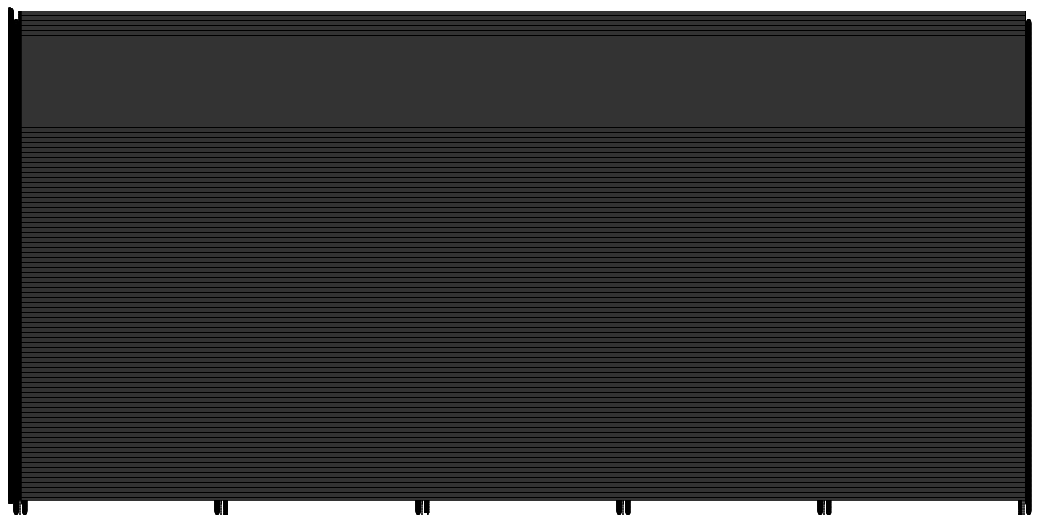

In [42]:
caloCount = max(df['caloNum'])
xtalCount = max(df['xtalNum'])

slopes = np.zeros((caloCount,xtalCount+1))
#matrix for stabilities of all energy ratios

fig,ax = plt.subplots(caloCount*xtalCount)

##something wrong when iterating over all calos; display ydata size=0 in curve_fit (for calo 15 and beyond)
for calo in pd.unique(df['caloNum']):
    for xtal in pd.unique(df['xtalNum']):
        df_xtal = df.loc[df['caloNum']==calo].loc[df['xtalNum']==xtal]
        # group table by fillNum and only select those fills with multiple signals 
        # and find the Energy of sync signal ( with min slmTime)

        df_fills = df_xtal.groupby('fillNum').count().reset_index()
        syncFills = df_fills[df_fills['slmTime']>1]
        df_sags = df_xtal[df_xtal['fillNum'].isin(syncFills['fillNum'])]
        result = df_sags.loc[df_sags.groupby('fillNum').idxmin()['slmTime']][['fillNum','slmEnergy']]
        result.rename({'slmEnergy': 'syncEnergy'}, axis = 'columns',inplace=True )

        df_normal = df_xtal.merge(result, on='fillNum', how='right')

        def func(x,m,b):
            return m*x + b 
        initial_guess = [1.2, 0.03]

        pars, pcov = curve_fit(func, df_normal['slmTime'], df_normal['syncEnergy']*df_normal['sipmEnergy']/df_normal['slmEnergy'], p0=initial_guess)

        # store time dependent coefficients in an array
        slopes[calo-1][xtal]=pars[0]





In [41]:
slopes[14]

array([2.58751987e-05, 1.26464753e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

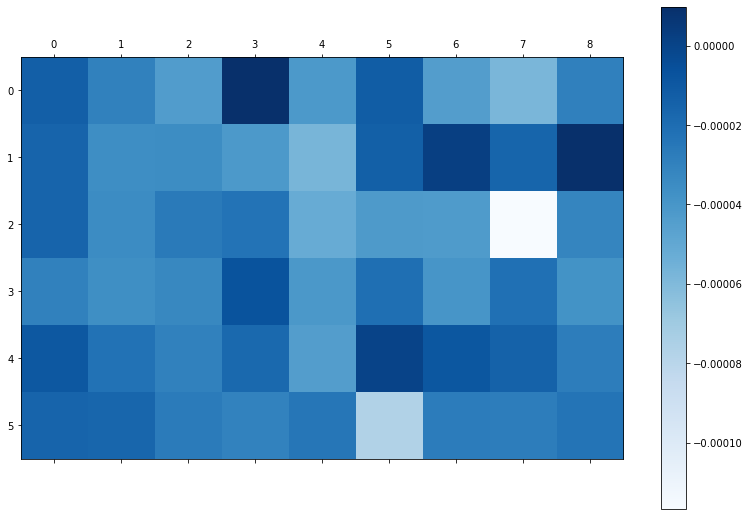

In [36]:
arr = np.zeros((caloCount ,6,9))
    
for calo in pd.unique(df['caloNum']):
    arr[calo-1] = slopes[calo-1].reshape(6,9)

plt.rcParams["figure.figsize"] = (18,9) 

plt.matshow(arr[16], cmap=plt.cm.Blues)
plt.colorbar()



In [48]:
slopes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [55]:
ax.

AttributeError: 'AxesSubplot' object has no attribute 'display'